In [ ]:
import sys
import tensorflow as tf
import nibabel as nib
import SimpleITK as sitk
import dltk
import numpy as np
import math
import matplotlib.pyplot as plt
from myshow import myshow
from tensorflow.python.framework import ops
import pylab as py
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
f1 = "011_S_0183_S12000_T1_brain_mni305.nii" #AD 1
f2 = "003_S_5165_S200117_T1_brain_mni305.nii" #AD 1
f3 = "067_S_0056_S16358_T1_brain_mni305.nii" #CN 0
f4 = "022_S_0044_S8814_T1_brain_mni305.nii" #MCI 2

In [4]:
#Use nibabel to read the image data
img = nib.load(f1)
img = img.get_fdata()
cut_y = img.shape[1] // 2
slice_1 = img[:, cut_y, :]

In [5]:
#Use sitk to read the image data, same as nibabel
m1 = sitk.ReadImage("011_S_0183_S12000_T1_brain_mni305.nii")
t1= sitk.GetArrayFromImage(m1) 

## Visualization

C:\Users\zhang\Application\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


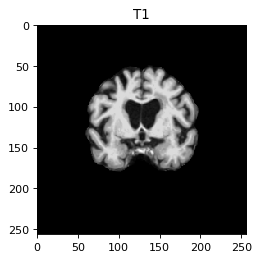

In [6]:
myshow(m1, title='T1')

C:\Users\zhang\Application\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


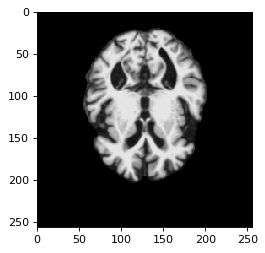

In [7]:
size = m1.GetSize()
myshow(m1[:, size[1] // 2, :])

C:\Users\zhang\Application\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


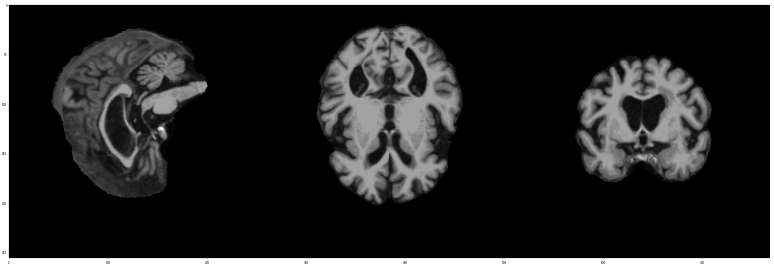

In [8]:
slices = [m1[size[0] // 2, :, :], m1[:, size[1] // 2, :],
          m1[:, :, size[2] // 2]]
myshow(sitk.Tile(slices, [3, 1]), dpi=20)

In [9]:
def myshow3d(img, xslices=[], yslices=[], zslices=[], title=None, margin=0.05,
             dpi=80):
    img_xslices = [img[s, :, :] for s in xslices]
    img_yslices = [img[:, s, :] for s in yslices]
    img_zslices = [img[:, :, s] for s in zslices]

    maxlen = max(len(img_xslices), len(img_yslices), len(img_zslices))

    img_null = sitk.Image([0, 0], img.GetPixelID(),
                          img.GetNumberOfComponentsPerPixel())

    img_slices = []
    d = 0

    if len(img_xslices):
        img_slices += img_xslices + [img_null] * (maxlen - len(img_xslices))
        d += 1

    if len(img_yslices):
        img_slices += img_yslices + [img_null] * (maxlen - len(img_yslices))
        d += 1

    if len(img_zslices):
        img_slices += img_zslices + [img_null] * (maxlen - len(img_zslices))
        d += 1

    if maxlen != 0:
        if img.GetNumberOfComponentsPerPixel() == 1:
            img = sitk.Tile(img_slices, [maxlen, d])
        # TO DO check in code to get Tile Filter working with vector images
        else:
            img_comps = []
            for i in range(0, img.GetNumberOfComponentsPerPixel()):
                img_slices_c = [sitk.VectorIndexSelectionCast(s, i)
                                for s in img_slices]
                img_comps.append(sitk.Tile(img_slices_c, [maxlen, d]))
            img = sitk.Compose(img_comps)

    myshow(img, title, margin, dpi)



C:\Users\zhang\Application\Anaconda3\envs\DeepLearning\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


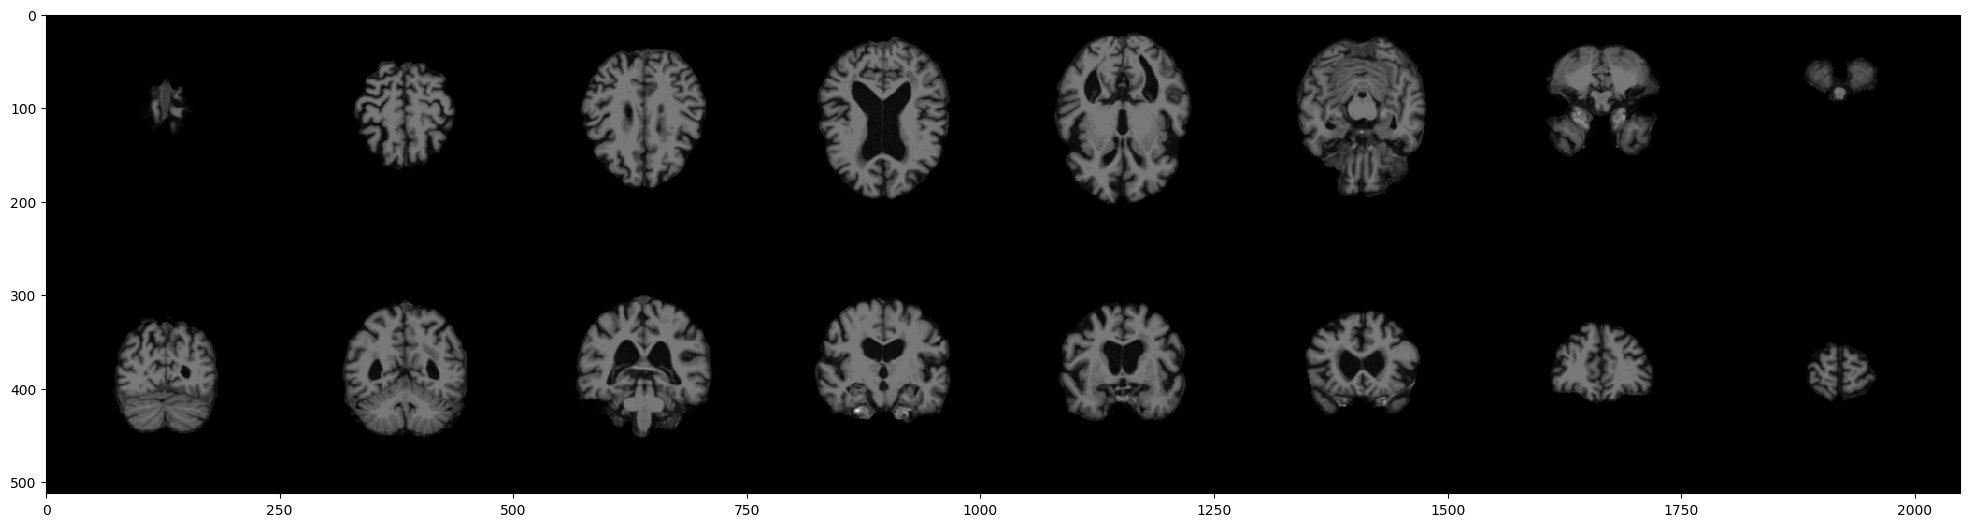

In [11]:
myshow3d(m1, yslices=range(50, size[1] - 50, 20),
         zslices=range(50, size[2] - 50, 20), dpi=100)